In [1]:
import geopandas as gpd

In [2]:
districts = gpd.GeoDataFrame.from_file('KA_2011.shp')

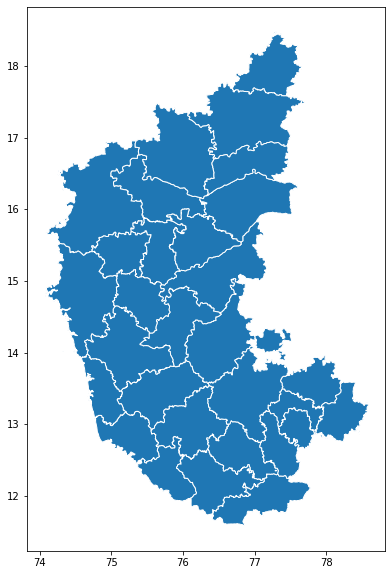

In [3]:
%matplotlib inline
districts.plot(figsize=(10,10), edgecolor='w')

In [4]:
districts['AREA'] = districts.geometry.area
districts.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry,AREA
0,Bagalkot,Karnataka,29,2,556,32,"POLYGON ((76.2410018416065 16.16530906045403, ...",0.555347
1,Bangalore Rural,Karnataka,29,29,583,45,(POLYGON ((77.38701262721541 13.50001585270428...,0.192308
2,Bangalore,Karnataka,29,18,572,46,"POLYGON ((77.83548561688282 12.8680934734969, ...",0.181833
3,Belgaum,Karnataka,29,1,555,65,(POLYGON ((75.02647483558135 16.93263612021824...,1.131739
4,Bellary,Karnataka,29,11,565,66,"POLYGON ((77.15757416830196 15.13705572949031,...",0.709894


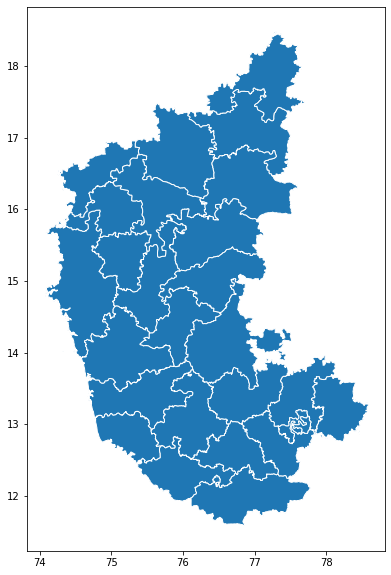

In [5]:
constituencies = gpd.GeoDataFrame.from_file('KA_PC_2014.shp')
constituencies.plot(figsize=(10,10), edgecolor='w')

In [6]:
constituencies['AREA'] = constituencies.geometry.area
constituencies.head()

,ST_NAME,PC_NAME,ST_CODE,PC_CODE,Res,orig_ogc_f,geometry,AREA
0,KA,Gulbarga,S10,5,SC,182,"POLYGON ((77.01154232289917 17.68226312757132,...",0.804582
1,KA,Bijapur,S10,4,SC,183,"POLYGON ((75.69589829251287 17.41194176957529,...",0.890767
2,KA,Chikkodi,S10,1,GEN,184,"POLYGON ((75.02647487015537 16.93263614740273,...",0.462652
3,KA,Raichur,S10,6,ST,185,"POLYGON ((76.79573255027397 15.93937958181353,...",0.831578
4,KA,Koppal,S10,8,GEN,186,"POLYGON ((76.63062352394796 16.07733111684218,...",0.761303


In [7]:
# Join the shapes. This creates a GeoDataFrame with one polygon per
# intersection. Attributes from both DataFrames are present, suffixed with
# _left and _right where there's an ovelap

merged = gpd.sjoin(districts, constituencies).reset_index().rename(
    columns={'index': 'index_left'})

In [8]:
# sjoin does not create a new geometry column. It uses the left.geometry
# We create a new geometry that is the intersection of the left and right.

def get_intersection(row):
    left_geom = districts['geometry'][row['index_left']]
    right_geom = constituencies['geometry'][row['index_right']]
    return left_geom.intersection(right_geom)

merged['geometry'] = merged.apply(get_intersection, axis=1)
merged['AREA'] = merged.geometry.area

In [9]:
merged.head()

,index_left,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f_left,geometry,AREA_left,index_right,ST_NAME,PC_NAME,ST_CODE,PC_CODE,Res,orig_ogc_f_right,AREA_right,AREA
0,0,Bagalkot,Karnataka,29,2,556,32,"(POLYGON ((75.03169637435363 16.3661917680201,...",0.555347,2,KA,Chikkodi,S10,1,GEN,184,0.462652,6.108034e-09
1,3,Belgaum,Karnataka,29,1,555,65,"POLYGON ((75.02647483558135 16.93263612021824,...",1.131739,2,KA,Chikkodi,S10,1,GEN,184,0.462652,4.626523e-01
2,6,Bijapur,Karnataka,29,3,557,82,"(POLYGON ((75.3878399922865 16.76194991108936,...",0.890762,2,KA,Chikkodi,S10,1,GEN,184,0.462652,2.254240e-09
3,0,Bagalkot,Karnataka,29,2,556,32,(POLYGON ((75.45243191083064 15.88705232756168...,0.555347,24,KA,Belgaum,S10,2,GEN,206,0.458116,2.620947e-03
4,3,Belgaum,Karnataka,29,1,555,65,"(POLYGON ((75.03171265848869 16.3664434698311,...",1.131739,24,KA,Belgaum,S10,2,GEN,206,0.458116,4.551532e-01
